# Imports
Run this code to import necessary modules. Note that the functions ``cost_function`` and ``gradient`` imported from module ``gd`` are stubs. You will need to fill in the code in ``gd.py``.

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from gd import cost_function, gradient, explicit_answer  # stubs

# Create a simple data set

Run this cell to generate and plot some data from the linear model $y \approx -1 + 2x$, that is, $\theta_0 = -1$ and  $\theta_1 = 2$.

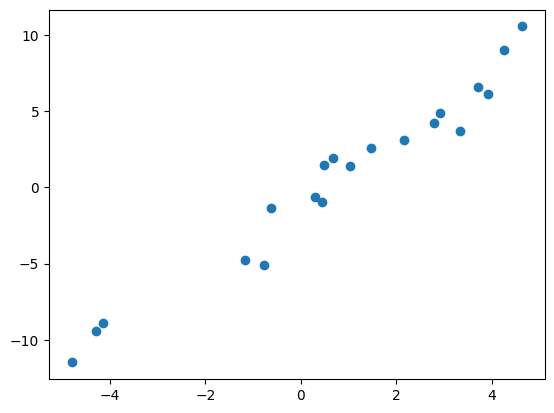

In [3]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x = 10 * np.random.rand(n) - 5

# Generate y values from the model y ~= 2x - 1
epsilon = np.random.randn(n)
y = -1 + 2*x + epsilon

plt.plot(x, y, marker='o', linestyle='none')
plt.show()

# TODO: implement the cost function
The squared error cost function is
$$\frac{1}{2} \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2.$$
$$h_\theta(x^{(i)})=\theta_0 + \theta_1 . x^{(i)}$$
Open the file ``gd.py`` and implement ``cost_function``. Then run this cell to test it out.

In [4]:
print(cost_function(x, y, 0,  1))   # should print 104.772951994
print(cost_function(x, y, 2, -1))   # should print 744.953822077
print(cost_function(x, y, -1, 2))   # should print 14.090816198

104.77295199433607
744.9538220768486
14.090816198013721


# Plotting setup
Run this cell. It sets up a routine ``plot_model`` that will be called later to illustrate the progress of gradient descent.

In [5]:
# Construct a dense grid of (theta_0, theta_1) values
theta0_vals = np.linspace(-10, 10)
theta1_vals = np.linspace(-10, 10)
[THETA0, THETA1] = np.meshgrid(theta0_vals, theta1_vals)

# Define a cost function that has x and y "baked in"
def mycost(theta0, theta1):
    return cost_function(x, y, theta0, theta1)

# Now vectorize this cost function and apply it simultaneously to all
# pairs in dense grid of (theta_0, theta_1) values
mycost_vectorized = np.vectorize(mycost)
J_SURF = mycost_vectorized(THETA0, THETA1)

# Define the test inputs
x_test = np.linspace(-5, 5, 100)

fig = plt.figure(1, figsize=(10,4))

# Create the figure
def init_plot():
    fig.clf()

    # Build left subplot (cost function)
    ax1 = fig.add_subplot(1, 2, 1) 
    ax1.contour(THETA0, THETA1, J_SURF, 20)
    ax1.set_xlabel('Intercept theta_0')
    ax1.set_ylabel('Slope theta_1')
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])

    # The data will be added later for these plot elements:
    line, = ax1.plot([], [])
    dot,  = ax1.plot([], [], marker='o')

    # Build right subplot (data + current hypothesis)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(x, y, marker='o', linestyle='none') 
    ax2.set_xlim([-6, 6])
    ax2.set_ylim([-10, 10])

    # The data will be added later for this:
    hyp, = ax2.plot( x_test, 0*x_test )
    
    return line, dot, hyp


# Define a function to update the plot
def update_plot(theta_0, theta_1, line, dot, hyp):
    line.set_xdata( np.append(line.get_xdata(), theta_0 ) )
    line.set_ydata( np.append(line.get_ydata(), theta_1 ) )
    dot.set_xdata([theta_0])
    dot.set_ydata([theta_1])
    hyp.set_ydata( theta_0 + theta_1 * x_test )

<Figure size 1000x400 with 0 Axes>

# TODO: implement the gradient
1. Review the mathematical expressions for $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$ and $\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$ for our model and cost funtion.
the formula for these two is:

$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)$

$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \sum_{i=1}^m \big((h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}\big)$

1. Implement the function ``gradient`` in ``gd.py`` to return these two partial derivatives.

Then run this cell to test your code: 

In [19]:
print(gradient(np.array([1, 2]), np.array([0, 1]), 0,  1)) # should print (2, 3)
print(gradient(x, y, 0,  1))   # should print (3.569176215534113, -163.58239266243288)
print(gradient(x, y, 2, -1))   # should print (10.94724640649514, -462.08205479805036)

(2, 3)
(3.569176215534111, -163.58239266243288)
(10.94724640649514, -462.0820547980504)


# TODO: implement gradient descent

1. In this cell you will implement gradient descent: 
    * Select a step size
    * Run for a fixed number of iterations (say, 20 or 200)
    * Update `theta_0` and `theta_1` using the partial derivatives (**Hint**: use the function ``gradient`` in ``gd.py``) 
    * Record the value of the cost function attained in each iteration of gradient descent so you can examine its progress.

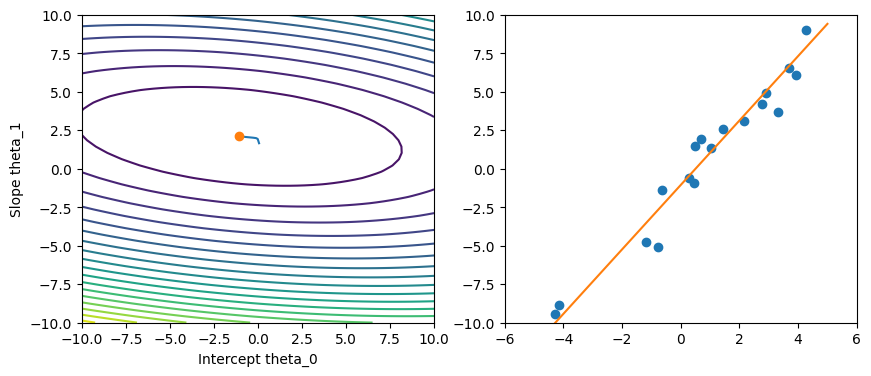

In [6]:
line, dot, hyp = init_plot()

iters = 200  # change as needed

####################################################################################
theta_0 = 0.0 
theta_1 = 0.0 
step_size = 0.005 
saved_costs = [] 
###################################################################################


for i in range(0, iters):

    #################################################################################
    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
    # I used our gradient function here to get d_theta_0, d_theta_1
    theta_0 = theta_0 - step_size * d_theta_0
    theta_1 = theta_1 - step_size * d_theta_1
    # I used our step_size here to update our theta_0 and theta_1
    cost = cost_function(x, y, theta_0, theta_1)
    saved_costs.append(cost)
    # I calculate our const_function and append it to our saving array
    #################################################################################

    #KEEP THIS CODE: this code will display progress of the 
    #algorithm as it runs 
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)


# TODO: compare gradient descent thetas with explicit thetas
complete ``explicit_answer`` function in ``gd.py`` and print results of both ways.

I calculated gradient descent with iter 20 and step size 0.01 and here the difference between explicit and gradient was a lot so I played with step size and iter and I found this one which gives us closer answer but run time is too long (14s)

In [7]:
############################################
ex_theta_0, ex_theta_1 = explicit_answer(x, y)

def print_results(theta_0, theta_1):
    print("----------------Theta 0----------------")
    print("gradient descent:", theta_0)
    print("explicit formula:", ex_theta_0)
    print("----------------Theta 1----------------")
    print("gradient descent:", theta_1)
    print("explicit formula:", ex_theta_1)
###########################################

print_results(theta_0, theta_1)

----------------Theta 0----------------
gradient descent: -1.0702535732471101
explicit formula: -1.0702535799250916
----------------Theta 1----------------
gradient descent: 2.093491125467973
explicit formula: 2.093491126207114


# TODO: assess convergence
Plot the iteration (x-axis) vs. cost.

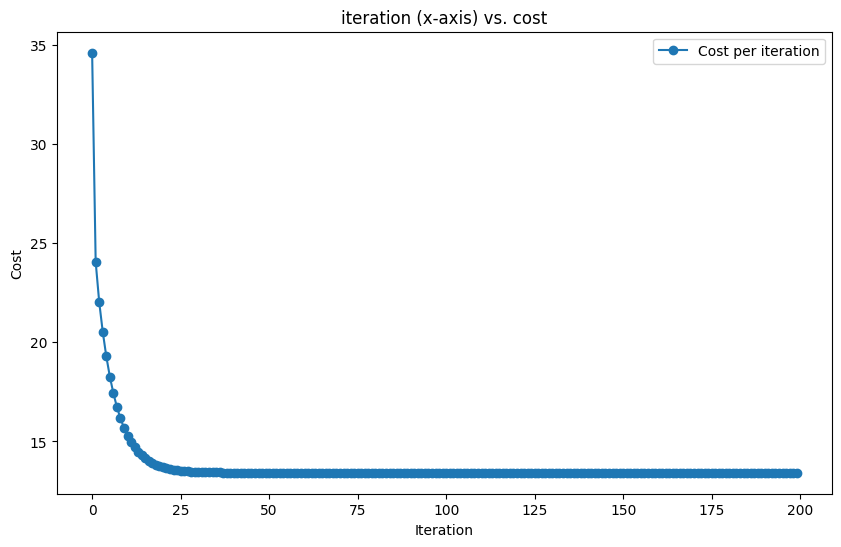

In [9]:
############################################

def iteration_plot(iters, saved_costs):
    plt.figure(figsize=(10, 6))
    plt.plot(range(iters), saved_costs, '-o', label='Cost per iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('iteration (x-axis) vs. cost')
    plt.legend()
    plt.show()

iteration_plot(iters, saved_costs)

###########################################

 Did the algorithm converge? (Converging means it found the actual setting of $\theta$ that minimizes the cost. If the cost went up or did not go down as far as it could, it did not converge.)

first I used 0.005 for my steps and 20 for my iterations and this was my results

----------------Theta 0----------------

gradient descent: -0.8793361898758901

explicit formula: -1.0702535799250916

----------------Theta 1----------------

gradient descent: 2.072359767892711

explicit formula: 2.093491126207114

and when I looked at my chart it was converging but you realized that it could go further more so I changed my iterations to 200 and I got these results you are looking at.
I am really happy about the results and yes it converges and working good.

# TODO: experiment with step size

After you have completed the implementation, do some experiments with different numbers of iterations and step sizes to assess convergence of the algorithm. Report the following:
* A step size for which the algorithm converges to the minimum in at most 200 iterations
* A step size for which the algorithm converges, but it takes more than 200 iterations
* A step size for which the algorithm does not converge, no matter how many iterations are run

your step size is: 0.012
----------------Theta 0----------------
gradient descent: -2.2194595042260756
explicit formula: -1.0702535799250916
----------------Theta 1----------------
gradient descent: -8.289343352875434
explicit formula: 2.093491126207114


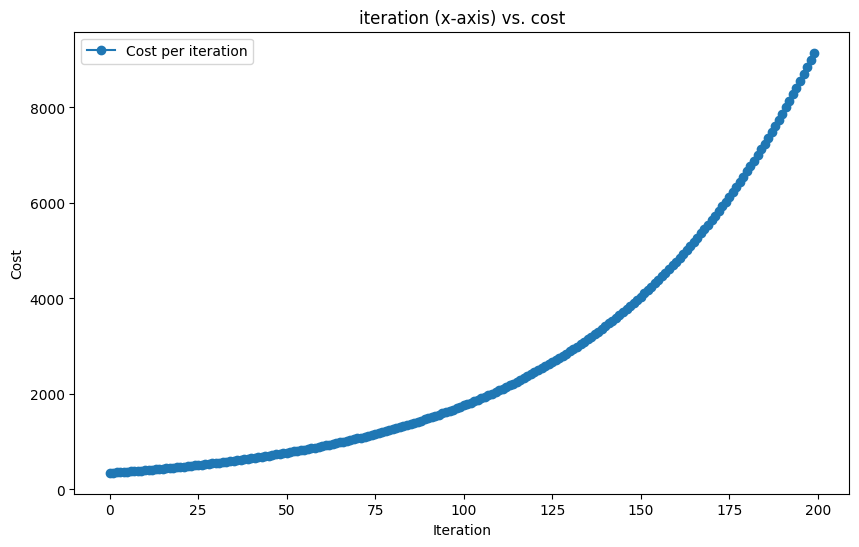

your step size is: 5e-05
----------------Theta 0----------------
gradient descent: -0.038318380979132184
explicit formula: -1.0702535799250916
----------------Theta 1----------------
gradient descent: 1.6114375309262539
explicit formula: 2.093491126207114


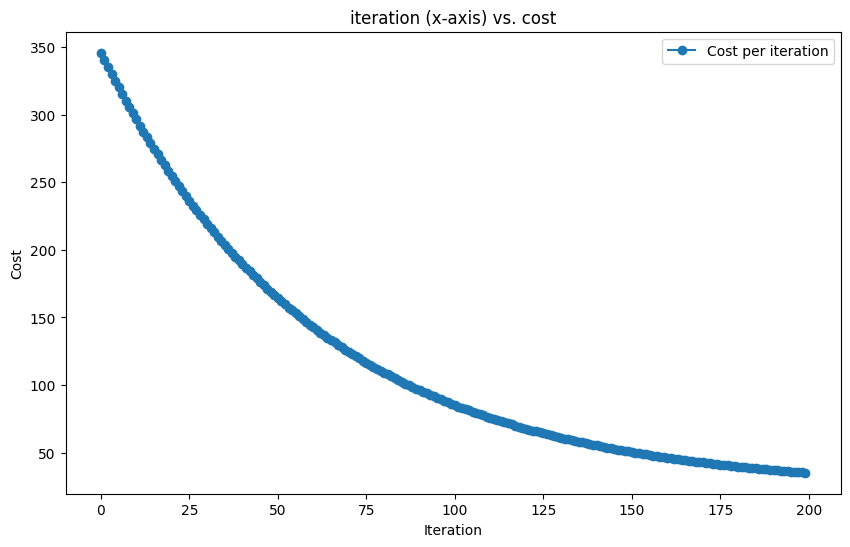

your step size is: 0.01
----------------Theta 0----------------
gradient descent: -1.0702535799250912
explicit formula: -1.0702535799250916
----------------Theta 1----------------
gradient descent: 2.0934911262071134
explicit formula: 2.093491126207114


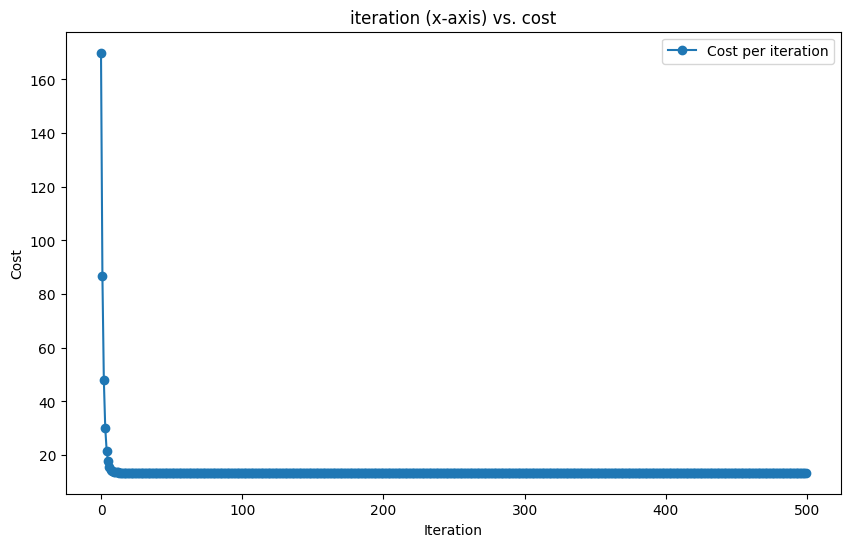

In [11]:
############################################
def experiment(step_size=0.05, iters=200):
    theta_0 = 0.0 
    theta_1 = 0.0 
    saved_costs = []
    for i in range(0, iters):
        d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
        theta_0 = theta_0 - step_size * d_theta_0
        theta_1 = theta_1 - step_size * d_theta_1
        cost = cost_function(x, y, theta_0, theta_1)
        saved_costs.append(cost)
    print(f"your step size is: {step_size}")
    print_results(theta_0, theta_1)
    iteration_plot(iters, saved_costs)

experiment(0.012, 200)
experiment(0.00005, 200)
experiment(0.01, 500)



I made the last snippet to try different step sizes and iterations easier and I checked so many numbers and from step size 0.012 it gets a little wired and stops converging.

so I printed the theta for each Item and drew charts for you so you can see your self 
for example in second example our model starts converging but we can see it needs more iterations to achieve better results.
